In [184]:
import os
import sys
import pandas
import numpy as np
import nibabel as ni
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import loadmat
from scipy.spatial.distance import dice
from glob import glob
from sklearn import mixture
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from matplotlib import mlab
import statsmodels.formula.api as smf



In [2]:
# matfile
matfile = '/Users/jakevogel/Science/tau/ESM_tau/results/March2018/ESM_lit_RW_MMC2_p.mat'
mat = loadmat(matfile)

In [3]:
# reference dataframe
refsht = '/Users/jakevogel/Science/tau/ADNI_MASTER.csv'
refdf = pandas.read_csv(refsht)


In [4]:
#scans = sorted(glob('/Users/jakevogel/Science/tau/nan_snorm_*'))
#sids = [x.split('/')[-1].split('_')[2] for x in scans]
#sids[0]
sidf = pandas.read_csv('/Users/jakevogel/Science/tau/braak_stage_rois.csv')
gind = sidf.AGE.dropna().index
sids = sidf.loc[gind,'subject'].values

In [23]:
len(sids)

236

In [255]:
! ls -lrth /Users/jakevogel/Science/tau/

total 5013120
-rw-rw-r--@  1 jakevogel  staff    14M Aug 20  2016 MNI152_T1_1mm_brain.nii
-rw-rw-r--@  1 jakevogel  staff   2.1M Sep 23  2016 test_4815.nii.gz
-rw-r--r--@  1 jakevogel  staff   120K Dec 14  2016 nii_dkt_atlas_1p5mm.nii.gz
-rw-rw-r--@  1 jakevogel  staff    25M Feb  2  2017 nan_snorm_002-S-4262_18F-AV1451_2016-02-25_P4_I651320.nii.gz
-rw-rw-r--@  1 jakevogel  staff    25M Feb  2  2017 nan_snorm_002-S-4521_18F-AV1451_2016-04-05_P4_I730844.nii.gz
-rw-rw-r--@  1 jakevogel  staff    25M Feb  2  2017 nan_snorm_002-S-4654_18F-AV1451_2016-04-21_P4_I699996.nii.gz
-rw-rw-r--@  1 jakevogel  staff    25M Feb  2  2017 nan_snorm_002-S-4799_18F-AV1451_2016-07-27_P4_I767572.nii.gz
-rw-rw-r--@  1 jakevogel  staff    25M Feb  2  2017 nan_snorm_007-S-2394_18F-AV1451_2016-07-19_P4_I762869.nii.gz
-rw-rw-r--@  1 jakevogel  staff    25M Feb  2  2017 nan_snorm_007-S-4620_18F-AV1451_2016-07-15_P4_I761155.nii.gz

-rw-rw-r--@  1 jakevogel  staff    25M Feb  2  2017 nan_snorm_012-S-4643_18F-AV1451

In [5]:
# reference dataframe
sht = '/Users/jakevogel/Science/tau/tau_adni_demo_cogchange_litROIs_earlytau.csv'
df = pandas.read_csv(sht)
df.head()

,Unnamed: 0,subs,subs.1,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.2,RID,SITE,COLPROT,ORIGPROT,...,brain_partition_consensus_ind_lund_sci5_scf5_5,lund_ET_3_1,lund_ET_3_2,lund_ET_3_3,lund_ET_6_1,lund_ET_6_2,lund_ET_6_3,lund_ET_6_4,lund_ET_6_5,lund_ET_6_6
0,0,002-S-4229,002-S-4229,002-S-4229,002-S-4229,002-S-4229,4229.0,2.0,ADNI2,ADNI2,...,1.001502,1.348725,1.067139,1.103361,1.348725,1.115261,1.081559,1.238158,1.103050,1.051729
1,1,002-S-4262,002-S-4262,002-S-4262,002-S-4262,002-S-4262,4262.0,2.0,ADNI2,ADNI2,...,1.145301,1.507033,1.165363,1.106672,1.507033,1.120392,1.141073,1.190362,1.182348,1.090506
2,2,002-S-4521,002-S-4521,002-S-4521,002-S-4521,002-S-4521,4521.0,2.0,ADNI2,ADNI2,...,1.250661,1.542644,1.144523,1.285093,1.542644,1.314419,1.292172,1.414967,1.184433,1.141633
3,3,002-S-4654,002-S-4654,002-S-4654,002-S-4654,002-S-4654,4654.0,2.0,ADNI2,ADNI2,...,1.186976,1.198241,1.018570,0.983168,1.198241,0.974095,1.043101,1.081553,1.044473,0.990339
4,4,002-S-4799,002-S-4799,002-S-4799,002-S-4799,002-S-4799,4799.0,2.0,ADNI2,ADNI2,...,1.095576,1.542920,1.317958,1.241442,1.542920,1.250776,1.319128,1.337707,1.332920,1.262309


In [6]:
all([x in df.subs.tolist() for x in sids])

True

In [7]:
mat.keys()

dict_keys(['Final_times', 'Final_RMSEs', 'Final_solutions', 'Final_CORRs', 'Nparameters', '__header__', 'Nnodes', 'num_repetitions', 'MUS0', 'h_integration', 'time_range', 'Long_Matrix', 'ONSETS_est', '__globals__', 'AGEs', 'DELTAS0', 'DELTAS_est', 'Nmodels', 'BETAS0', 'Final_parameters', 'models', 'Conn_Matrix', '__version__', 'SIGMAS0', 'BETAS_est', 'Nsubjects', 'ref_pattern'])

In [8]:
mat['models'][0,0][0][0]

array([19, 58,  1], dtype=uint8)

In [8]:
labs = pandas.read_csv('/Users/jakevogel/git/pycourse_vuMC/stuff/dst_labels.csv', header=None)
labs.columns = ['integer_label', 'label']
labs.head()

,integer_label,label
0,1,Caudal anterior cingulate
1,2,Caudal middle frontal
2,3,Cuneus
3,4,entorinal
4,5,fusiform


In [9]:
mat.keys()

dict_keys(['Conn_Matrix', 'model_solutions0', 'model_RMSEs0', 'time_range', 'DELTAS0', 'AGEs', '__globals__', 'model_times0', 'MUS0', 'SIGMAS0', 'h_integration', 'Nsubjects', 'num_repetitions', 'Nparameters', 'BETAS0', '__version__', 'model_parameters0', '__header__', 'Long_Matrix', 'model_CORRs0', 'ref_pattern'])

In [18]:
mat['model_RMSEs0'].flatten().shape

(236,)

In [6]:
def get_results(mat, sids, save=True, labels = None, lit = False):

    if not lit:
        res = pandas.DataFrame(index = sids)
        for i in range(len(mat['ref_pattern'][0])):
            # Model fits
            sid = sids[i]
            r,p = stats.pearsonr(mat['ref_pattern'][:,i], mat['Final_solutions'][:,i])
            res.loc[sid,'model_r'] = r
            res.loc[sid,'model_r2'] = r**2
        res.loc[:, 'model_RMSE'] = mat['Final_RMSEs'].flatten()
        res.loc[:, 'model_eval'] = mat['Final_CORRs'].flatten()

        if save:
            # params
            res.loc[:, 'beta'] = mat['Final_parameters'][0,:].flatten()
            res.loc[:, 'delta'] = mat['Final_parameters'][1,:].flatten()
            res.loc[:, 'sigma'] = mat['Final_parameters'][2,:].flatten()

            # other
            res.loc[:, 'ref_age'] = mat['AGEs'].flatten()
            res.loc[:, 'times'] = mat['Final_times'].flatten()
            res.loc[:, 'Onset_age'] = mat['ONSETS_est'].flatten()

        print('average r2 = ', res.model_r2.mean())
        print('average RMSE =', res.model_RMSE.mean())
        print('average eval =', res.model_eval.mean())

        if type(labels) != type(None):
            print('model identfied the following epicenters')
            for l in mat['models'][0,0][0][0]:
                print(labels.iloc[l-1]['label'])

        if save:
            return res
        
    else:
        res = pandas.DataFrame(index = sids)
        for i in range(len(mat['ref_pattern'][0])):
            # Model fits
            sid = sids[i]
            r,p = stats.pearsonr(mat['ref_pattern'][:,i], mat['model_solutions0'][:,i])
            res.loc[sid,'model_r'] = r
            res.loc[sid,'model_r2'] = r**2
        res.loc[:, 'model_RMSE'] = mat['model_RMSEs0'].flatten()
        res.loc[:, 'model_eval'] = mat['model_CORRs0'].flatten()

        if save:
            # params
            res.loc[:, 'beta'] = mat['model_parameters0'][0,:].flatten()
            res.loc[:, 'delta'] = mat['model_parameters0'][1,:].flatten()
            res.loc[:, 'sigma'] = mat['model_parameters0'][2,:].flatten()

            # other
            res.loc[:, 'ref_age'] = mat['AGEs'].flatten()
            res.loc[:, 'times'] = mat['model_times0'].flatten()
            #res.loc[:, 'Onset_age'] = mat['ONSETS_est'].flatten()

        print('average r2 = ', res.model_r2.mean())
        print('average RMSE =', res.model_RMSE.mean())
        print('average eval =', res.model_eval.mean())

        #if type(labels) != type(None):
        #    print('model identfied the following epicenters')
        #    for l in mat['models'][0,0][0][0]:
        #        print(labels.iloc[l-1]['label'])

        if save:
            return res

In [7]:
#res = get_results(mat, sids, labels=labs)
res = get_results(mat, sids, labels=labs, lit=True) #RW MMC2

NameError: name 'labs' is not defined

In [9]:
#res = get_results(mat, sids, labels=labs)
res = get_results(mat, sids, labels=labs, lit=True) #VW MMC2

average r2 =  0.2100235457356556
average RMSE = 0.23565004317164645
average eval = 0.5163690166852205


In [45]:
#res = get_results(mat, sids, labels=labs)
res = get_results(mat, sids, labels=labs, lit=True) #Ref_normed

average r2 =  0.09237954348242015
average RMSE = 0.14806691792068957
average eval = 0.7869650098587192


In [12]:
df.columns[18:30]

Index(['APOE4', 'FDG', 'PIB', 'AV45', 'CDRSB', 'ADAS11', 'ADAS13', 'MMSE',
       'RAVLT_immediate', 'RAVLT_learning', 'RAVLT_forgetting',
       'RAVLT_perc_forgetting'],
      dtype='object')

In [ ]:
sidf.A

In [10]:
# add demos
#res.loc[:,'amyloid'] = df.av45_status_wcb.values
#res.loc[:,'DX'] = df.DX_final.values
#res.loc[:,'Age'] = df.AGE.values
#res.loc[:,'Gender'] = df.PTGENDER.values
#res.loc[:,'Education'] = df.PTEDUCAT.values
#res.loc[:,'ApoE4'] = df.APOE4.values

res.loc[:,'amyloid'] = sidf.loc[gind].av45_status.values
res.loc[:,'DX'] = sidf.loc[gind].DX_fill.values
res.loc[:,'Age'] = sidf.loc[gind].AGE.values
res.loc[:,'Gender'] = sidf.loc[gind].PTGENDER.values
res.loc[:,'Education'] = sidf.loc[gind].PTEDUCAT.values
res.loc[:,'ApoE4'] = sidf.loc[gind].APOE4.values

In [11]:
print('age', res['Age'].mean(), res['Age'].std())
print('percent female', len(res[res.Gender=='Female']) / len(res))

age 71.34576271186438 6.603547003907556
percent female 0.4449152542372881


In [65]:
res.Age.mean()

71.34576271186438

In [66]:
res.ref_age.mean()

71.34576271186438

In [67]:
refdf.index = [x.replace('_','-') for x in refdf.PTID]

AttributeError: 'float' object has no attribute 'replace'

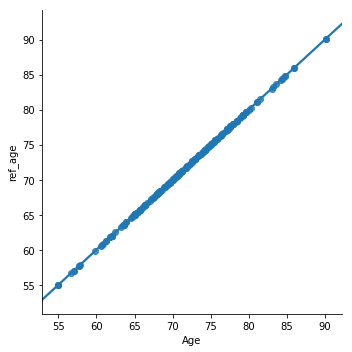

In [68]:
plt.close()
sns.lmplot('Age','ref_age',data=res)
plt.show()

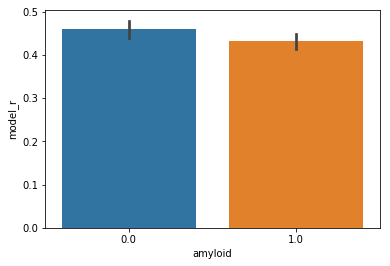

In [12]:
plt.close()
sns.barplot('amyloid','model_r',data=res)
plt.show()

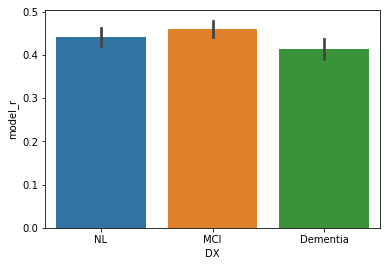

In [13]:
plt.close()
sns.barplot('DX','model_r',data=res)
plt.show()

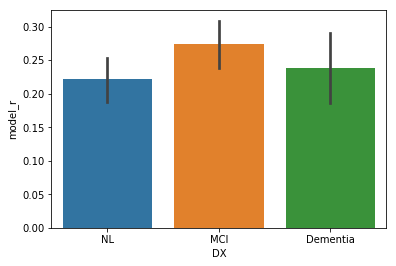

In [50]:
plt.close()
sns.barplot('DX','model_r',data=res)
plt.show()

In [16]:
for col in res.columns[:10]:
    t,p = stats.ttest_ind(res[res.amyloid==0][col],
                         res[res.amyloid==1][col])
    if p<0.10:
        print(col,t,p)

model_r 2.1258192561 0.0345660273281
model_r2 2.74629171416 0.00649590239212
delta -2.75735377912 0.00628692329553
ref_age -2.70665569496 0.00729732240497
times 1.93305951503 0.0544354665678
amyloid -inf 0.0


In [103]:
res.columns

Index(['model_r', 'model_r2', 'model_RMSE', 'model_eval', 'beta', 'delta',
       'sigma', 'ref_age', 'times', 'amyloid', 'DX', 'Age', 'Gender',
       'Education', 'ApoE4'],
      dtype='object')

In [116]:
xvars = res.columns[4:7].tolist() + [res.columns[11]] + res.columns[13:].tolist()

In [117]:
xvars

['beta', 'delta', 'sigma', 'Age', 'Education', 'ApoE4', 'Sex_bin']

In [140]:
res.loc[:,'Sex_bin'] = [0 if x == 'Male' else 1 for x in res.Gender.values]

In [118]:
lr = linear_model.LogisticRegression()
lr.fit(res[xvars],res['amyloid'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [126]:
smf.Logit?

In [133]:
smf.Logit(res['amyloid'],res[xvars]).fit().summary()

Optimization terminated successfully.
         Current function value: 0.647002
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                amyloid   No. Observations:                  236
Model:                          Logit   Df Residuals:                      230
Method:                           MLE   Df Model:                            5
Date:                Fri, 30 Mar 2018   Pseudo R-squ.:                 0.06347
Time:                        17:54:55   Log-Likelihood:                -152.69
converged:                       True   LL-Null:                       -163.04
                                        LLR p-value:                 0.0009250
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
beta          -0.1278      0.216     -0.593      0.553      -0.550       0.295
delta          0.0157      0.006      2.446      0.014       0.003       0.028
sigma         -2.8412      5.152     -0.552      0.581     -12.938       7.256
Age            0.0340      0.012      2.880      0.004       0.011       0.057
Education     -0.1591      0.045     -3.545      0.000      -0.247      -0.071
Sex_bin       -0.0338      0.258     -0.131      0.896      -0.539       0.471
==============================================================================
"""

In [131]:
#xvars.remove('ApoE4')
xvars.remove('amyloid')

In [132]:
smf.MNLogit(res['ApoE4'],res[xvars]).fit().summary()

Optimization terminated successfully.
         Current function value: 0.816220
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                  ApoE4   No. Observations:                  236
Model:                        MNLogit   Df Residuals:                      224
Method:                           MLE   Df Model:                           10
Date:                Fri, 30 Mar 2018   Pseudo R-squ.:                 0.03905
Time:                        17:54:25   Log-Likelihood:                -192.63
converged:                       True   LL-Null:                       -200.46
                                        LLR p-value:                    0.1099
==============================================================================
   ApoE4=1       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
beta          -0.0913      0.233     -0.392      0.695      -0.549       0.366
delta          0.0016      0.007      0.248      0.804      -0.011       0.015
sigma          6.9438      5.597      1.241      0.215      -4.026      17.913
Age           -0.0256      0.013     -2.030      0.042      -0.050      -0.001
Education      0.0057      0.047      0.121      0.903      -0.086       0.098
Sex_bin        0.3916      0.277      1.416      0.157      -0.150       0.934
------------------------------------------------------------------------------
   ApoE4=2       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
beta          -0.4544      0.489     -0.930      0.353      -1.412       0.504
delta          0.0111      0.010      1.146      0.252      -0.008       0.030
sigma         17.9465     10.626      1.689      0.091      -2.879      38.772
Age           -0.0129      0.021     -0.614      0.539      -0.054       0.028
Education     -0.1292      0.080     -1.612      0.107      -0.286       0.028
Sex_bin       -0.1972      0.491     -0.402      0.688      -1.159       0.764
==============================================================================
"""

In [139]:
xvars

['beta', 'delta', 'sigma', 'Age', 'Education']

In [141]:
#xvars.remove('Sex_bin')
#xvars.remove('amyloid')
smf.Logit(res['Sex_bin'],res[xvars]).fit().summary()

Optimization terminated successfully.
         Current function value: 0.676878
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Sex_bin   No. Observations:                  236
Model:                          Logit   Df Residuals:                      231
Method:                           MLE   Df Model:                            4
Date:                Fri, 30 Mar 2018   Pseudo R-squ.:                 0.01483
Time:                        17:57:32   Log-Likelihood:                -159.74
converged:                       True   LL-Null:                       -162.15
                                        LLR p-value:                    0.3075
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
beta          -0.0520      0.208     -0.251      0.802      -0.459       0.355
delta         -0.0009      0.006     -0.158      0.875      -0.013       0.011
sigma          2.1032      4.975      0.423      0.672      -7.648      11.855
Age            0.0146      0.010      1.431      0.152      -0.005       0.035
Education     -0.0835      0.042     -1.968      0.049      -0.167      -0.000
==============================================================================
"""

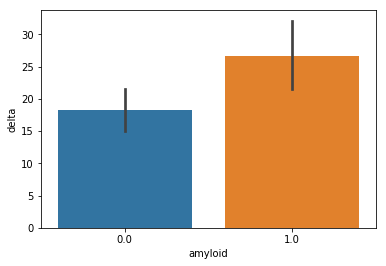

In [15]:
plt.close()
sns.barplot('amyloid','delta',data=res)
plt.show()

In [17]:
for col in res.columns[:10]:
    f,p = stats.f_oneway(res[res.DX=='NL'][col],
                         res[res.DX=='MCI'][col],
                        res[res.DX=='Dementia'][col])
    if p<0.05:
        print(col,f,p)

model_r2 3.23653869089 0.041073320039
amyloid 18.1980116011 4.5330684855e-08


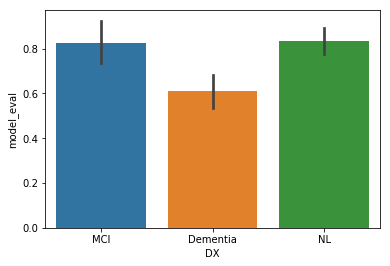

In [24]:
plt.close()
sns.barplot('DX','model_eval',data=res)
plt.show()

In [18]:
res2 = pandas.DataFrame(res,copy=True)
res2.loc[:,'subid'] = res2.index
res2.index = range(res2.shape[0])

In [19]:
res2.loc[:,'DX_AB'] = [res2.loc[x,'DX']+'+' if res2.loc[x,'amyloid']==1 else res2.loc[x,'DX']+'-' for x in res2.index]

In [20]:
nres = pandas.DataFrame(res2,copy=True)

In [21]:
nres.loc[:,'DX_AB'] = [nres.loc[x,'DX']+'+' if nres.loc[x,'amyloid']==1 else nres.loc[x,'DX']+'-' for x in nres.index]

In [22]:
for col in res.columns[:10]:
    f,p = stats.f_oneway(nres[nres.DX_AB=='NL-'][col],
                         nres[nres.DX_AB=='NL+'][col],
                         nres[nres.DX_AB=='MCI-'][col],
                         nres[nres.DX_AB=='MCI+'][col],
                        nres[nres.DX_AB=='Dementia+'][col])
    if p<0.1:
        print(col,f,p)

model_r 2.03167713144 0.0908127335746
model_r2 2.98241560395 0.0198895056797
delta 1.98864364375 0.0970774177315
ref_age 2.03342438307 0.0905666517751
times 2.03040427604 0.090992400927


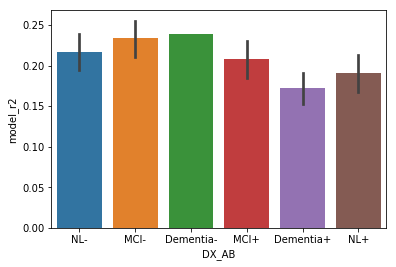

In [80]:
plt.close()
sns.barplot('DX_AB','model_r2',data=res2)
plt.show()

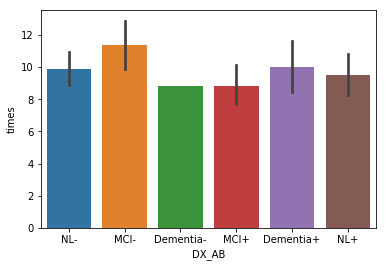

In [83]:
plt.close()
sns.barplot('DX_AB','times',data=res2)
plt.show()

In [23]:
for dx in res2.DX_AB.unique():
    print(dx,len(res2[res2.DX_AB==dx]))

NL- 74
MCI- 51
Dementia- 1
MCI+ 48
Dementia+ 24
NL+ 38


In [24]:
for col in res.columns[:10]:
    t,p = stats.ttest_ind(res[res.ApoE4==0][col],
                         res[res.ApoE4==1][col])
    if p<0.05:
        print(col,t,p)

ref_age 3.27152376404 0.00124516675904
times 2.82675860841 0.00514365738869
amyloid -3.97320124571 9.664771435e-05


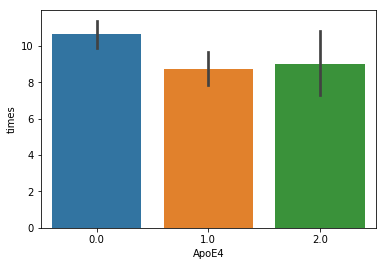

In [84]:
plt.close()
sns.barplot('ApoE4','times',data=res2)
plt.show()

In [193]:
res.columns[:10]

Index(['model_r', 'model_r2', 'model_RMSE', 'model_eval', 'beta', 'delta',
       'sigma', 'ref_age', 'times', 'amyloid'],
      dtype='object')

In [25]:
for col in res.columns[:10]:
    t,p = stats.ttest_ind(res[res.Gender=='Male'][col],
                         res[res.Gender=='Female'][col])
    print(col,t,p)
    if p<0.05:
        print(col,t,p)

model_r 1.00680020443 0.315070749014
model_r2 1.64644134078 0.101015270618
model_RMSE 0.411670257011 0.68095794945
model_eval -0.924192662053 0.356338057299
beta 0.326074561272 0.744659365203
delta 0.304879426593 0.760728978778
sigma 0.210319292492 0.833601497336
ref_age 2.35319512825 0.0194414868422
ref_age 2.35319512825 0.0194414868422
times 1.14724021854 0.252453981734
amyloid -0.538767616294 0.590559383709


In [26]:
for col in res.columns[:10]:
    r,p = stats.pearsonr(res[col], res['Education'])
    if p<0.05:
        print(col,r,p)

amyloid -0.168715076835 0.00941159127747


In [27]:
# look at regional accuracy across subjects
# look at subject accuracy across regions
# look at relationship between total tau(P) and model fit params
# make average images for disease-ab groups for true and predicted probabilities
# examine probability metrics



In [34]:
mat.keys()

dict_keys(['Final_times', 'Final_RMSEs', 'Final_solutions', 'Final_CORRs', 'Nparameters', '__header__', 'Nnodes', 'num_repetitions', 'MUS0', 'h_integration', 'time_range', 'Long_Matrix', 'ONSETS_est', '__globals__', 'AGEs', 'DELTAS0', 'DELTAS_est', 'Nmodels', 'BETAS0', 'Final_parameters', 'models', 'Conn_Matrix', '__version__', 'SIGMAS0', 'BETAS_est', 'Nsubjects', 'ref_pattern'])

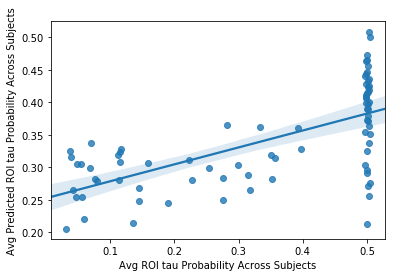

r2 =  0.415933682503


In [28]:
# look at regional accuracy across subjects
plt.close()
#sns.regplot(mat['ref_pattern'].mean(1), mat['Final_solutions'].mean(1))
sns.regplot(mat['ref_pattern'].mean(1), mat['model_solutions0'].mean(1))
plt.xlabel('Avg ROI tau Probability Across Subjects')
plt.ylabel('Avg Predicted ROI tau Probability Across Subjects')
plt.show()
r,p = stats.pearsonr(mat['ref_pattern'].mean(1), mat['model_solutions0'].mean(1))
print('r2 = ',r**2)

In [353]:
labs[labs.distr==2].index


Int64Index([ 1,  2,  4,  5,  6,  7,  8, 11, 12, 13, 15, 17, 19, 20, 22, 24, 27,
            28, 29, 33, 39, 43, 44, 45, 46, 47, 50, 51, 53, 54, 56, 58, 59, 61,
            63, 65, 67, 68, 78, 79],
           dtype='int64')

In [359]:
mat['ref_pattern'][labs.loc[labs.index[:78]][labs.distr==2].index].mean(1)

//anaconda/envs/py3/lib/python3.5/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


array([ 0.07575831,  0.31827394,  0.0682059 ,  0.03103526,  0.15940039,
        0.39780129,  0.04622506,  0.33276197,  0.19001491,  0.253615  ,
        0.07932408,  0.05627257,  0.0538932 ,  0.226776  ,  0.22260696,
        0.04134724,  0.03660831,  0.0595947 ,  0.27563088,  0.39260061,
        0.2996373 ,  0.03939018,  0.14485376,  0.11482847,  0.35072259,
        0.31484689,  0.28166318,  0.11183146,  0.35613714,  0.07005718,
        0.27537623,  0.1160169 ,  0.35257479,  0.11586417,  0.04860931,
        0.14455636,  0.11377309,  0.13489629])

//anaconda/envs/py3/lib/python3.5/site-packages/ipykernel/__main__.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
//anaconda/envs/py3/lib/python3.5/site-packages/ipykernel/__main__.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


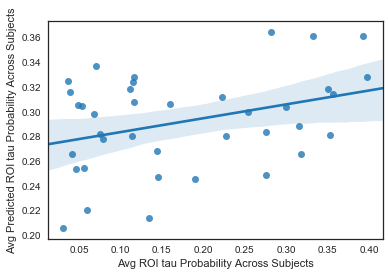

r2 =  0.119841402784


//anaconda/envs/py3/lib/python3.5/site-packages/ipykernel/__main__.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
//anaconda/envs/py3/lib/python3.5/site-packages/ipykernel/__main__.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [98]:
# look at regional accuracy across subjects
plt.close()
#sns.regplot(mat['ref_pattern'].mean(1), mat['Final_solutions'].mean(1))
sns.regplot(mat['ref_pattern'][labs.loc[labs.index[:78]][labs.distr==2].index].mean(1), 
            mat['model_solutions0'][labs.loc[labs.index[:78]][labs.distr==2].index].mean(1))
plt.xlabel('Avg ROI tau Probability Across Subjects')
plt.ylabel('Avg Predicted ROI tau Probability Across Subjects')
plt.show()
r,p = stats.pearsonr(mat['ref_pattern'][labs.loc[labs.index[:78]][labs.distr==2].index].mean(1),
                     mat['model_solutions0'][labs.loc[labs.index[:78]][labs.distr==2].index].mean(1))
print('r2 = ',r**2)

In [250]:
jnk.shape
#mat['ref_pattern'].mean(1)[:78].shape

(80, 6)

In [251]:
# LOG TRANSFORM THE ECDF (BOX-COX) VALUES
jnk = pandas.DataFrame(roi_test, copy=True)
jnk.loc[jnk.index[:78],'prob'] = mat['ref_pattern'].mean(1)
unimods = jnk[jnk.distr=='unimodal']
unimods.head()

,int_lab,str_lab,r2,h_str_lab,distr,prob
0,1,Caudal anterior cingulate,0.328851,l_Caudal anterior cingulate,unimodal,0.502409
3,4,entorinal,0.379364,l_entorinal,unimodal,0.504325
9,10,Lateral orbitofronal,0.475000,l_Lateral orbitofronal,unimodal,0.503499
16,17,Pars orbitalis,0.473220,l_Pars orbitalis,unimodal,0.501512
18,19,Pericalcarine,0.431073,l_Pericalcarine,unimodal,0.500651


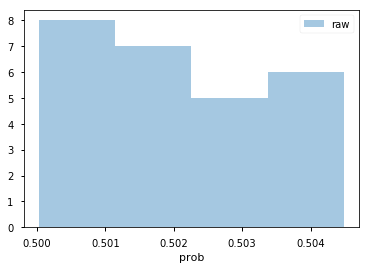

In [261]:
plt.close()
sns.distplot(unimods.prob, label='raw',kde=False)
#sns.distplot(stats.boxcox(unimods.prob)[0], label='boxcox',kde=False)
plt.legend()
plt.show()

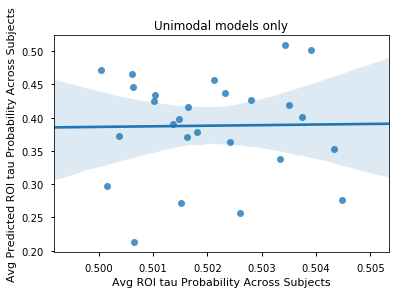

r2 =  0.000240598586983


In [262]:
# look at regional accuracy across subjects
plt.close()
#sns.regplot(mat['ref_pattern'].mean(1), mat['Final_solutions'].mean(1))
sns.regplot(mat['ref_pattern'].mean(1)[unimods.index], 
            mat['model_solutions0'].mean(1)[unimods.index])
plt.xlabel('Avg ROI tau Probability Across Subjects')
plt.ylabel('Avg Predicted ROI tau Probability Across Subjects')
plt.title('Unimodal models only')
plt.show()
r,p = stats.pearsonr(mat['ref_pattern'].mean(1)[unimods.index], 
                     mat['model_solutions0'].mean(1)[unimods.index])
print('r2 = ',r**2)

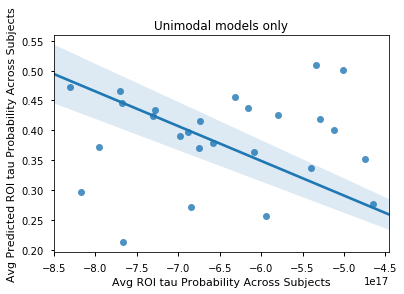

r2 =  0.000464506012283


In [263]:
# look at regional accuracy across subjects
plt.close()
#sns.regplot(mat['ref_pattern'].mean(1), mat['Final_solutions'].mean(1))
sns.regplot(stats.boxcox(unimods.prob)[0], 
            mat['model_solutions0'].mean(1)[unimods.index])
plt.xlabel('Avg ROI tau Probability Across Subjects')
plt.ylabel('Avg Predicted ROI tau Probability Across Subjects')
plt.title('Unimodal models only')
plt.show()
r,p = stats.pearsonr(stats.boxcox(unimods.prob)[0], 
                     mat['model_solutions0'].mean(1)[unimods.index])
print('r2 = ',r**2)

In [41]:
r2s = []
for i in range(mat['ref_pattern'].shape[0]):
    r = stats.pearsonr(mat['ref_pattern'][i,:],mat['model_solutions0'][i,:])[0]
    r2s.append(r**2)



In [42]:
roi_test = pandas.DataFrame(labs,copy=True)
roi_test.loc[roi_test.index[:78],'r2'] = r2s
roi_test.head()

,int_lab,str_lab,r2
0,1,Caudal anterior cingulate,0.319598
1,2,Caudal middle frontal,0.314464
2,3,Cuneus,0.585420
3,4,entorinal,0.343623
4,5,fusiform,0.379444


In [43]:
roi_test.loc[:,'h_str_lab'] = [
        'l_%s'%roi_test.str_lab[x] if x < 39 else 'r_%s'%roi_test.str_lab[x] for x in range(roi_test.shape[0])]
roi_test.head()

,int_lab,str_lab,r2,h_str_lab
0,1,Caudal anterior cingulate,0.319598,l_Caudal anterior cingulate
1,2,Caudal middle frontal,0.314464,l_Caudal middle frontal
2,3,Cuneus,0.585420,l_Cuneus
3,4,entorinal,0.343623,l_entorinal
4,5,fusiform,0.379444,l_fusiform


In [93]:
roi_test.loc[roi_test.index[:78],'distr'] = [
        'bimodal' if x <0.45 else 'unimodal' for x in mat['ref_pattern'].mean(1)]

average =  0.4388268967649528


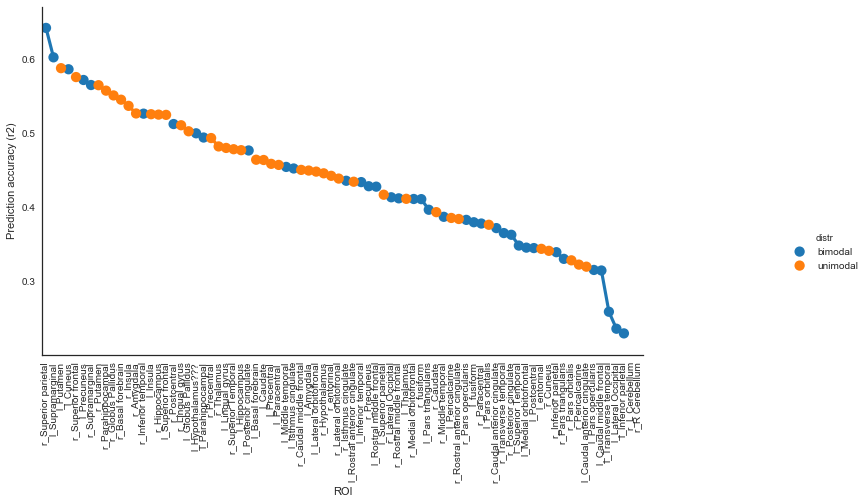

In [47]:
plt.close()
sns.set_context('notebook')
sns.set_style('white')
g = sns.factorplot(x='h_str_lab', y='r2',data=roi_test.sort_values('r2',ascending=False),
                  ci=None, hue='distr')
g.set_xticklabels(rotation=90)
g.fig.set_size_inches((14,6))
plt.xlabel('ROI')
plt.ylabel('Prediction accuracy (r2)')
#for ax in g.axes: 
#    ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
print('average = ',roi_test.r2.mean())
plt.show()

In [204]:
explt = pandas.concat([pandas.Series(mat['ref_pattern'][22,:]),
               pandas.Series(mat['model_solutions0'][22,:]),
               res2.DX_AB],axis=1)
explt.columns = ['Reference','Predicted','DX_AB']
explt.head()

,Reference,Predicted,DX_AB
0,0.088922,0.220015,NL-
1,0.114622,0.469262,NL-
2,0.118443,0.507159,MCI-
3,0.269090,0.399937,MCI-
4,0.088849,0.182236,NL-


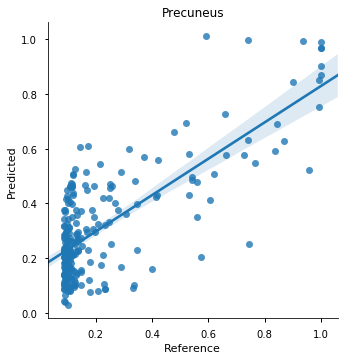

In [205]:
plt.close()
sns.lmplot(x='Reference', y='Predicted', data=explt)
plt.title('Precuneus')
plt.show()

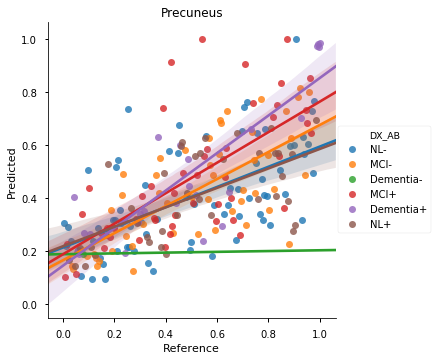

In [173]:
plt.close()
sns.lmplot(x='Reference', y='Predicted', hue='DX_AB', data=explt)
plt.title('Precuneus')
plt.show()

In [206]:
explt = pandas.concat([pandas.Series(mat['ref_pattern'][26,:]),
               pandas.Series(mat['model_solutions0'][26,:]),
               res2.DX_AB],axis=1)
explt.columns = ['Reference','Predicted','DX_AB']
explt.head()

,Reference,Predicted,DX_AB
0,0.302905,0.218335,NL-
1,0.112033,0.324240,NL-
2,0.576763,0.343913,MCI-
3,0.622407,0.237910,MCI-
4,0.502075,0.155342,NL-


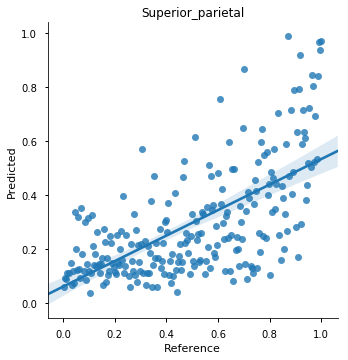

In [208]:
plt.close()
sns.lmplot(x='Reference', y='Predicted', data=explt)
plt.title('Superior_parietal')
plt.show()

In [32]:
oldf = pandas.read_csv('/Users/jakevogel/Science/tau/ESM_tau/results/March2018/smoothed_SUVR_roi_data.csv')
oldf = oldf.loc[gind]

In [218]:
oldf.shape

(236, 83)

In [220]:
mat['ref_pattern'].shape

(78, 236)

In [33]:
oldmat = oldf[oldf.columns[:78]].transpose().values
oldmat.shape

(78, 236)

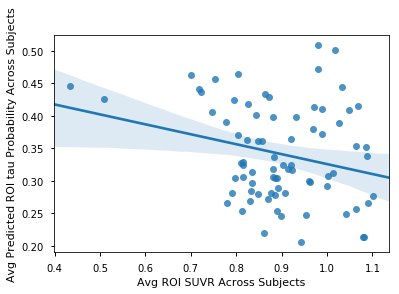

r2 =  0.0641933577576


In [223]:
# look at regional accuracy across subjects
plt.close()
#sns.regplot(mat['ref_pattern'].mean(1), mat['Final_solutions'].mean(1))
sns.regplot(oldmat.mean(1), mat['model_solutions0'].mean(1))
plt.xlabel('Avg ROI SUVR Across Subjects')
plt.ylabel('Avg Predicted ROI tau Probability Across Subjects')
plt.show()
r,p = stats.pearsonr(oldmat.mean(1), mat['model_solutions0'].mean(1))
print('r2 = ',r**2)

In [49]:
r2s2 = []
for i in range(oldmat.shape[0]):
    r = stats.pearsonr(oldmat[i,:],mat['model_solutions0'][i,:])[0]
    r2s2.append(r**2)


In [50]:
roi_test = pandas.DataFrame(labs,copy=True)
roi_test.loc[roi_test.index[:78],'r2'] = r2s2
roi_test.loc[:,'h_str_lab'] = [
        'l_%s'%roi_test.str_lab[x] if x < 39 else 'r_%s'%roi_test.str_lab[x] for x in range(roi_test.shape[0])]
roi_test.loc[roi_test.index[:78],'distr'] = [
        'bimodal' if x <0.5 else 'unimodal' for x in mat['ref_pattern'].mean(1)]
roi_test.head()

,int_lab,str_lab,r2,h_str_lab,distr
0,1,Caudal anterior cingulate,0.328851,l_Caudal anterior cingulate,unimodal
1,2,Caudal middle frontal,0.458637,l_Caudal middle frontal,bimodal
2,3,Cuneus,0.548792,l_Cuneus,bimodal
3,4,entorinal,0.379364,l_entorinal,unimodal
4,5,fusiform,0.472464,l_fusiform,bimodal


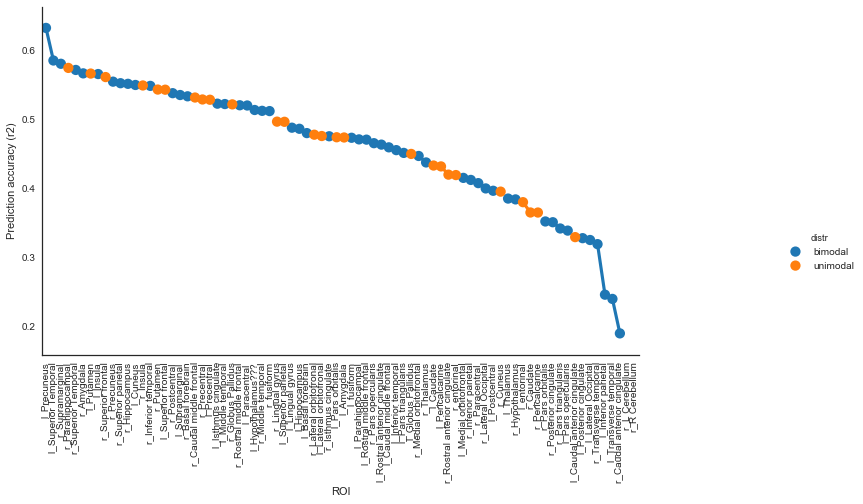

average =  0.46297834569403573


In [51]:
plt.close()
g = sns.factorplot(x='h_str_lab', y='r2',data=roi_test.sort_values('r2',ascending=False),
                  ci=None, hue='distr')
g.set_xticklabels(rotation=90)
g.fig.set_size_inches((14,6))
plt.xlabel('ROI')
plt.ylabel('Prediction accuracy (r2)')
#for ax in g.axes: 
#    ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()
print('average = ',roi_test.r2.mean())

In [97]:
labs.loc[:,'distr'] = [1 if x=='unimodal' else 2 for x in roi_test.distr]

In [145]:
jnk = ni.load('/Users/jakevogel/Science/tau/dkt_atlas_1p5mm.nii')
aff = jnk.affine
dkt = jnk.get_data()
dmap = np.zeros_like(dkt)
for i,row in labs.iterrows():
    dmap[dkt==row['int_lab']] = row['distr']
nimg = ni.Nifti1Image(dmap, aff)
nimg.to_filename('/Users/jakevogel/Science/tau/ESM_tau/results/March2018/distribution_map')

In [283]:
hm.shape

(78, 236)

In [293]:
#sorter.sort_values('roimean',axis=1)

In [297]:
sorter2.head()

,0,1,2,3,4,5,6,7,8,9,...,226,227,228,229,230,231,232,233,234,235
0,0.310838,0.157704,0.955107,0.373561,0.193143,0.096685,0.176808,0.126068,0.637193,0.063136,...,0.464604,0.808198,0.630876,0.545807,0.144735,0.133235,0.415190,0.365237,0.604223,0.205708
1,0.294025,0.198552,0.343841,0.314958,0.178380,0.097294,0.164465,0.117580,0.208832,0.146410,...,0.282510,0.359817,0.398437,0.498316,0.156664,0.076188,0.528545,0.722040,0.347669,0.201870
2,0.140929,0.359171,0.429664,0.262181,0.131016,0.105179,0.038536,0.059142,0.745643,0.139288,...,0.377201,0.464275,0.401640,0.325037,0.081864,0.071664,0.094771,0.437398,0.605060,0.169484
3,0.370486,0.362228,0.163239,0.222881,0.641260,0.055093,0.261232,0.056649,0.051430,0.099069,...,0.339141,0.340296,0.961834,0.813471,0.486955,0.031012,0.132962,0.432446,0.754435,0.125341
4,0.281678,0.435834,0.249914,0.240901,0.196207,0.101687,0.187726,0.080570,0.201716,0.034680,...,0.191339,0.391751,0.554988,0.554816,0.294912,0.161473,0.220391,0.497449,0.613442,0.188698


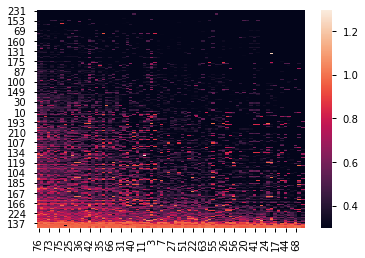

In [326]:
hm = pandas.DataFrame(mat['model_solutions0'])
sorter = pandas.DataFrame(hm, copy=True)
sorter.loc['roimean',:] = sorter.mean()
sorter2 = pandas.DataFrame(hm, copy=True)
sorter2.loc[:,'submean'] = sorter2.mean(axis=1)

plt.close()
sns.heatmap(hm.loc[sorter2.sort_values('submean',axis=0, ascending=False).index,
            sorter.sort_values('roimean',axis=1).columns
                  ].transpose(),
           vmin = 0.3)
plt.show()

In [364]:
labs.str_lab.shape

(80,)

In [366]:
roi_test.columns

Index(['int_lab', 'str_lab', 'r2', 'h_str_lab', 'distr'], dtype='object')

In [369]:
oldf.shape

(80, 156)

In [371]:
oldf = pandas.read_csv('/Users/jakevogel/Science/tau/ESM_tau/results/March2018/smoothed_SUVR_roi_data.csv')
oldf = oldf.loc[gind]
oldf = oldf[oldf.columns[:80]]
oldf.columns = roi_test.h_str_lab

In [376]:
[x for x in oldf.columns if 'temp' in x]

['l_Inferior temporal',
 'l_Middle temporal',
 'l_Transverse temporal',
 'r_Inferior temporal',
 'r_Middle temporal',
 'r_Transverse temporal']

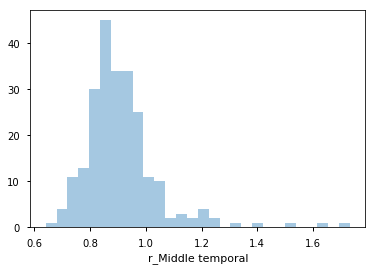

In [442]:
plt.close()
sns.distplot(oldf['r_Middle temporal'], kde=False)
plt.show()

In [399]:
mm2 = GaussianMixture(n_components=2,random_state=123)
mmod = mm2.fit(oldf['r_Middle temporal'].values.reshape(-1,1))


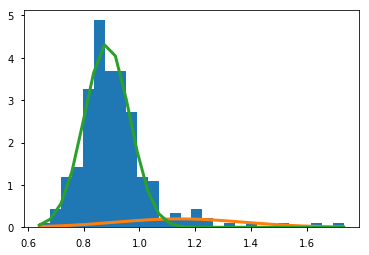

In [441]:
m1, m2 = mmod.means_
w1, w2 = mmod.weights_
c1, c2 = mmod.covariances_
plt.close()
histdist = plt.hist(oldf['r_Middle temporal'], 28, normed=True)
plotgauss1 = lambda x: plt.plot(x,w1*mlab.normpdf(x,m1,np.sqrt(c1))[0], linewidth=3)
plotgauss2 = lambda x: plt.plot(x,w2*mlab.normpdf(x,m2,np.sqrt(c2))[0], linewidth=3)
plotgauss1(histdist[1])
plotgauss2(histdist[1])
plt.show()

In [403]:
mixture.GaussianMixture?

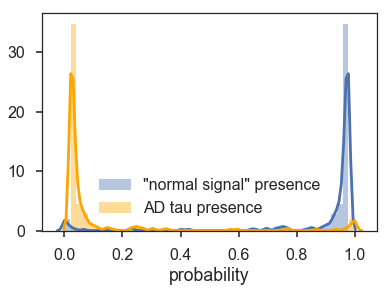

In [460]:
plt.close()
sns.set_context('poster')
sns.set_style('ticks')
sns.distplot(mmod.predict_proba(oldf['r_Middle temporal'].values.reshape(-1,1))[:,1],
             label='"normal signal" presence')
sns.distplot(mmod.predict_proba(oldf['r_Middle temporal'].values.reshape(-1,1))[:,0],
            label='AD tau presence', color = 'orange')
plt.legend()
plt.xlabel('probability')
plt.show()

In [465]:
num = len([x for x in mmod.predict_proba(oldf['r_Middle temporal'].values.reshape(-1,1)
                                        )[:,0] if x > 0.2])
num / len(oldf['r_Middle temporal'].values)

0.1228813559322034

In [327]:
sorter2.index = labs.str_lab[:78]
sorter2.sort_values('submean',axis=0, ascending=False).index

Index(['Putamen', 'Putamen', 'Insula', 'Caudate', 'Thalamus',
       'Superior frontal', 'Globus Pallidus', 'Hippocampus', 'Thalamus',
       'Superior frontal', 'Lateral orbitofronal',
       'Rostral anterior cingulate', 'Globus Pallidus', 'Precentral',
       'Lateral orbitofronal', 'entorinal', 'Insula', 'Basal forebrain',
       'Hippocampus', 'Hypothalamus', 'Caudate', 'Superior Temporal',
       'Rostral anterior cingulate', 'Precentral', 'Basal forebrain',
       'Parahippocampal', 'Lingual gyrus', 'Caudal middle frontal',
       'Medial orbitofrontal', 'Caudal anterior cingulate',
       'Medial orbitofrontal', 'Hypothalamus???', 'Amygdala', 'entorinal',
       'Amygdala', 'Pars opercularis', 'Isthmus cingulate', 'Postcentral',
       'Paracentral ', 'Superior Temporal', 'Inferior temporal',
       'Isthmus cingulate', 'Middle temporal', 'fusiform', 'Paracentral ',
       'Precuneus', 'Precuneus', 'Inferior temporal', 'Rostral middle frontal',
       'Postcentral', 'Caudal ant

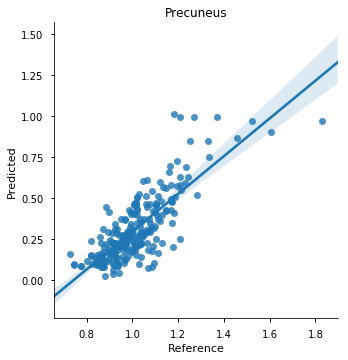

In [230]:
explt = pandas.concat([pandas.Series(oldmat[22,:]),
               pandas.Series(mat['model_solutions0'][22,:]),
               res2.DX_AB],axis=1)
explt.columns = ['Reference','Predicted','DX_AB']
plt.close()
sns.lmplot(x='Reference', y='Predicted', data=explt)
plt.title('Precuneus')
plt.show()

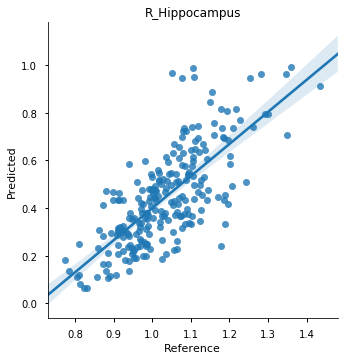

0.550456699613


In [238]:
explt = pandas.concat([pandas.Series(oldmat[74,:]),
               pandas.Series(mat['model_solutions0'][74,:]),
               res2.DX_AB],axis=1)
explt.columns = ['Reference','Predicted','DX_AB']
plt.close()
sns.lmplot(x='Reference', y='Predicted', data=explt)
plt.title('R_Hippocampus')
plt.show()
print(stats.pearsonr(explt.Reference, explt.Predicted)[0]**2)

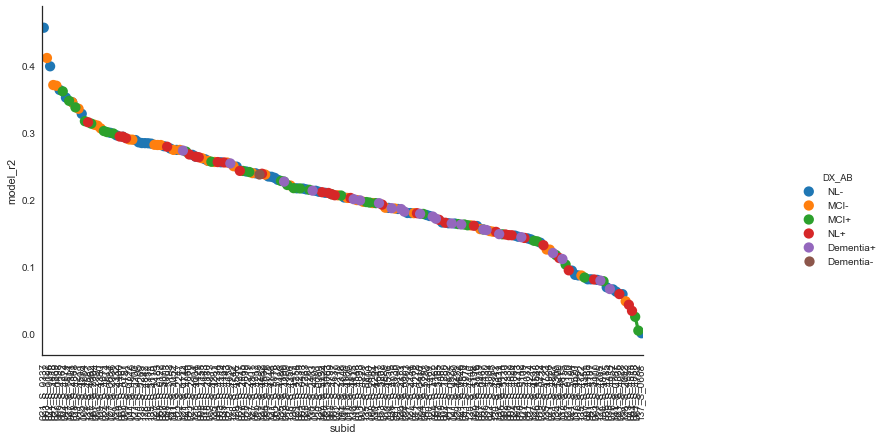

0.2100235457356556


In [54]:
plt.close()
sns.set_context('notebook')
g = sns.factorplot(x='subid', y='model_r2',data=res2.sort_values('model_r2',ascending=False),
                  ci=None, hue = 'DX_AB')
g.set_xticklabels(rotation=90)
g.fig.set_size_inches((14,6))
#for ax in g.axes: 
#    ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()
print(res2.model_r2.mean())

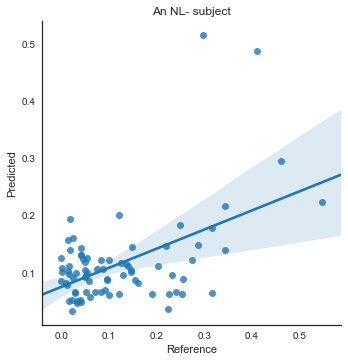

In [100]:
explt = pandas.concat([pandas.Series(mat['ref_pattern'][:,112]),
               pandas.Series(mat['model_solutions0'][:,112]),
               res2.DX_AB],axis=1)
explt.columns = ['Reference','Predicted','DX_AB']
plt.close()
sns.lmplot(x='Reference', y='Predicted', data=explt)
plt.title('An NL- subject')
#plt.xlim(0.9,1.01)
plt.show()

In [65]:
mx = max(res2[res2.DX_AB=='Dementia+']['model_r2'])
[x for x in res2.index if res2.loc[x,'model_r2'] == mx]

[234]

In [99]:
res2.sort_values('model_eval',ascending=False)

,model_r,model_r2,model_RMSE,model_eval,beta,delta,sigma,ref_age,times,amyloid,DX,Age,Gender,Education,ApoE4,subid,DX_AB
162,0.258251,0.066693,0.084919,1.333369,0.0405,11.1109,0.02,60.8,13.021918,1.0,Dementia,60.8,Female,18.0,1.0,035_S_4414,Dementia+
231,0.289565,0.083848,0.093403,1.212246,0.8977,4.0974,0.09,67.8,6.252055,1.0,MCI,67.8,Female,16.0,1.0,137_S_4351,MCI+
207,0.067368,0.004538,0.103431,1.094716,0.0822,0.0405,0.02,71.9,9.550685,1.0,MCI,71.9,Male,16.0,2.0,067_S_4782,MCI+
112,0.508260,0.258328,0.103649,1.092411,0.1469,7.1372,0.04,77.6,4.794521,0.0,MCI,77.6,Female,12.0,0.0,018_S_2180,MCI-
20,0.508260,0.258328,0.118093,0.958798,0.1469,7.1372,0.04,77.6,4.794521,0.0,NL,77.6,Female,12.0,0.0,018_S_2180,NL-
17,0.492392,0.242450,0.121951,0.928470,2.1569,4.7194,0.05,77.9,14.517808,0.0,NL,77.9,Female,16.0,1.0,018_S_4399,NL-
9,0.242847,0.058975,0.127451,0.888402,1.0080,9.9995,0.04,63.5,6.731507,0.0,NL,63.5,Female,18.0,0.0,037_S_4028,NL-
171,0.207768,0.043167,0.127689,0.886747,1.0080,0.7291,0.10,63.2,4.200000,1.0,NL,63.2,Male,17.0,1.0,073_S_4552,NL+
120,0.263203,0.069276,0.128873,0.878600,1.0080,0.7291,0.10,66.7,4.257534,0.0,NL,66.7,Female,13.0,0.0,035_S_4785,NL-
91,0.450467,0.202921,0.129432,0.874807,3.4591,0.5477,0.08,74.1,28.287671,0.0,MCI,74.1,Male,12.0,0.0,141_S_4160,MCI-


In [271]:
mat['model_solutions0'].shape

(78, 236)

In [273]:
r2s3 = []
for i in range(oldmat.shape[1]):
    r = stats.pearsonr(oldmat[:,i],mat['model_solutions0'][:,i])[0]
    r2s3.append(r**2)
res2.loc[:,'r2_to_orig'] = r2s3


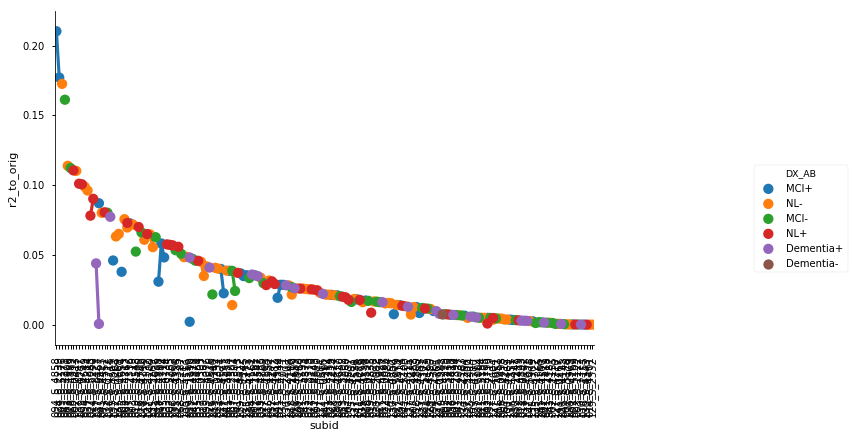

In [274]:
plt.close()
g = sns.factorplot(x='subid', y='r2_to_orig',
                   data=res2.sort_values('r2_to_orig',ascending=False),
                   ci=None, hue = 'DX_AB')
g.set_xticklabels(rotation=90)
g.fig.set_size_inches((14,6))
#for ax in g.axes: 
#    ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

What about subject level dice coefficients for Tau v no-tau

In [80]:
col = '0.2'
ref = [1 if x > float(col) else 0 for x in mat['ref_pattern'][:,i]]
pred = [1 if x > float(col) else 0 for x in mat['model_solutions0'][:,i]]
print(dice(ref,pred))
print(len([x for x in range(len(ref)) if ref[x]==pred[x]]) / len(ref)) 

0.3118279569892473
0.6282051282051282


In [84]:
dice_r = pandas.DataFrame(index = range(mat['model_solutions0'].shape[1]), 
                          columns = ['0.2','0.5','0.9'])
for col in dice_r.columns:
    for i in dice_r.index:
        ref = [1 if x > float(col) else 0 for x in mat['ref_pattern'][:,i]]
        pred = [1 if x > float(col) else 0 for x in mat['model_solutions0'][:,i]]
        hit_rate = len([x for x in range(len(ref)) if ref[x]==pred[x]]
                                         ) / len(ref)
        dice_r.loc[i,'%s_perc'%col] = hit_rate
        if hit_rate < 1:
            dice_r.loc[i,col] = dice(ref,pred)
        else:
            dice_r.loc[i,col] = 1.0
         
    print('finished',col)

finished 0.2
finished 0.5
finished 0.9


In [89]:
res.model_RMSE.mean()

0.23565004317164645

In [91]:
dice_r.mean()

0.2         0.321008
0.5         0.617708
0.9         0.947470
0.2_perc    0.664168
0.5_perc    0.798674
0.9_perc    0.937907
dtype: float64

In [83]:
len([x for x in range(len(ref)) if ref[x]==pred[x]]
                                         ) / len(ref)

1.0

In [ ]:
explt = pandas.concat([pandas.Series(mat['ref_pattern'][26,:]),
               pandas.Series(mat['model_solutions0'][26,:]),

In [36]:
jnk = mat['ref_pattern'].mean(1)
[i for i in range(len(jnk)) if jnk[i] <0.49]

[34, 38, 73, 77]

In [60]:
labs.loc[77]

integer_label           78
label             Thalamus
Name: 77, dtype: object

In [49]:
lablist = list(range(len(mat['ref_pattern'].mean(1))))
todel = [i for i in range(len(jnk)) if jnk[i] <0.49]
for i,lab in enumerate(todel):
    lablist.remove(lab)
jref = mat['ref_pattern'].mean(1)[lablist]
jpred = mat['Final_solutions'].mean(1)[lablist]

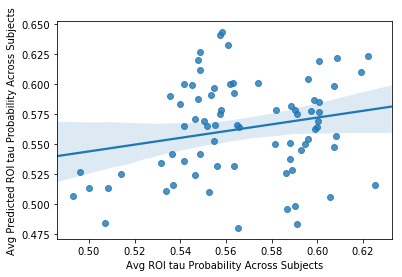

In [52]:
# look at regional accuracy across subjects
plt.close()
sns.regplot(jref, jpred)
plt.xlabel('Avg ROI tau Probability Across Subjects')
plt.ylabel('Avg Predicted ROI tau Probability Across Subjects')
plt.show()

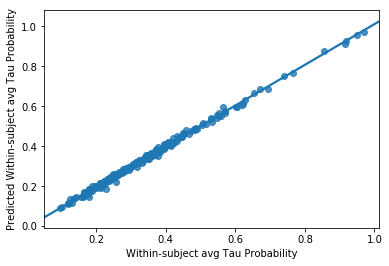

In [91]:
# look at subject accuracy across regions
plt.close()
#sns.regplot(mat['ref_pattern'].mean(0), mat['Final_solutions'].mean(0))
sns.regplot(mat['ref_pattern'].mean(0), mat['model_solutions0'].mean(0))
plt.xlabel('Within-subject avg Tau Probability')
plt.ylabel('Predicted Within-subject avg Tau Probability')
plt.show()

In [94]:
#res.loc[:,'pred_avg_tau_prob'] = mat['Final_solutions'].mean(0)
res.loc[:,'pred_avg_tau_prob'] = mat['model_solutions0'].mean(0)
res.loc[:,'avg_tau_prob'] = mat['ref_pattern'].mean(0)

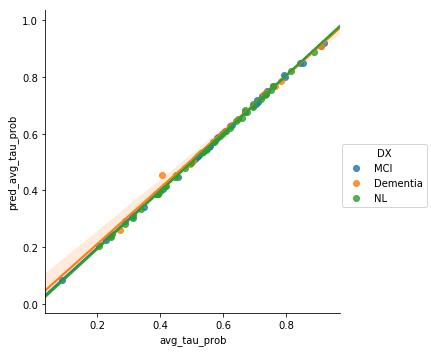

In [47]:
# look at subject accuracy across regions
plt.close()
sns.lmplot('avg_tau_prob', 'pred_avg_tau_prob',data=res,hue='DX')
plt.show()

In [245]:
plt.subplots?

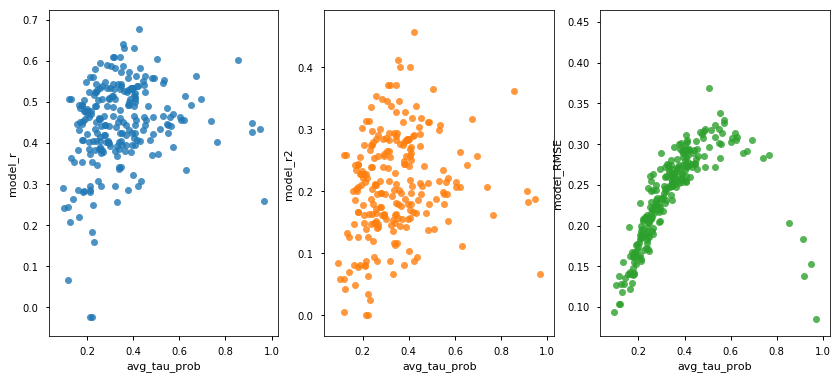

model_r 0.213672984912 0.000955505472297
model_r2 0.193524751309 0.00283140206137
model_RMSE 0.574470477949 4.01286291881e-22


In [334]:
# look at relationship between total tau(P) and model fit params
plt.close()
fig, axes = plt.subplots(ncols=3,sharex=True,figsize = (14,6))
for i,col in enumerate(res.columns[:3]):
    sns.regplot('avg_tau_prob', col, data=res, ax = axes[i], fit_reg=False)

plt.show()
for col in res.columns[:3]:
    r,p = stats.pearsonr(res[col], res['avg_tau_prob'])
    print(col,r,p)

In [347]:
res.loc[:,'avg_C2_tau_prob'] = mat['ref_pattern'][labs.loc[labs.index[:78]
                                                          ][labs.distr==2].index,:].mean(0)

//anaconda/envs/py3/lib/python3.5/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


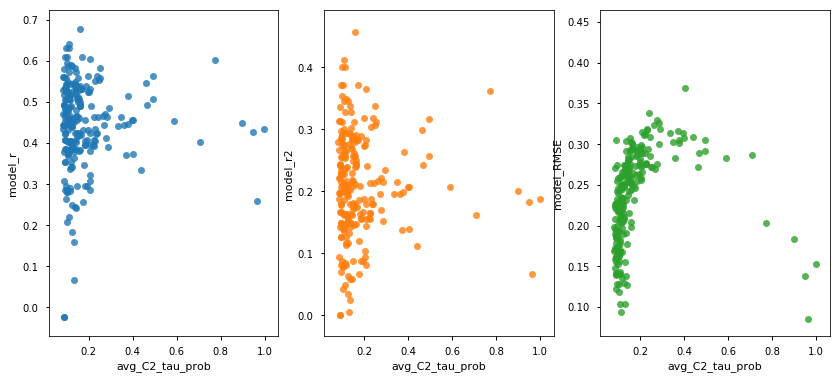

model_r 0.00544807517805 0.933651839835
model_r2 -0.0174071654326 0.790228229693
model_RMSE 0.189320886931 0.00350696669187


In [349]:
# look at relationship between total tau(P) and model fit params
plt.close()
fig, axes = plt.subplots(ncols=3,sharex=True,figsize = (14,6))
for i,col in enumerate(res.columns[:3]):
    sns.regplot('avg_C2_tau_prob', col, data=res, ax = axes[i], fit_reg=False)

plt.show()
for col in res.columns[:3]:
    r,p = stats.pearsonr(res[col], res['avg_C2_tau_prob'])
    print(col,r,p)

In [37]:
# make average images for disease-ab groups for true and predicted probabilities
labs = pandas.read_csv('/Users/jakevogel/git/pycourse_vuMC/stuff/dst_labels.csv',header=None)
labs.columns = ['int_lab','str_lab']
labs.str_lab = [x.lstrip() for x in labs.str_lab]
njnk = ni.load('/Users/jakevogel/Science/tau/dkt_atlas_1p5mm.nii')
atl = njnk.get_data()

In [106]:
labs['int_lab'][:78].shape
refT.columns.shape

(78,)

In [143]:
refT = pandas.DataFrame(mat['ref_pattern']).transpose()
refT.index = res2.index
refT.columns = labs['int_lab'][:78]
#predT = pandas.DataFrame(mat['Final_solutions']).transpose()
predT = pandas.DataFrame(mat['model_solutions0']).transpose()
predT.index = res2.index
predT.columns = labs['int_lab'][:78]

In [116]:
res2[res2.DX_AB==dx].index

Int64Index([  0,   1,   4,   6,   9,  15,  16,  17,  18,  20,  21,  22,  23,
             24,  30,  31,  32,  33,  35,  36,  40,  41,  42,  46,  48,  49,
             52,  53,  54,  56,  57,  58,  60,  62,  64,  65,  66,  67,  68,
             73,  75,  77,  78,  80,  82,  83,  85,  86,  87,  88,  90,  92,
             93,  95,  97,  98,  99, 101, 102, 106, 108, 111, 113, 114, 115,
            116, 117, 118, 119, 120, 121, 123, 124, 125],
           dtype='int64')

In [146]:

dfs = {'reference': refT, 'predicted': predT}
for dx in res2.DX_AB.unique():
    for nm,d in dfs.items():
        imap = np.zeros_like(atl)
        sdf = d.loc[res2[res2.DX_AB==dx].index].mean(axis=0) 
        for roi in np.unique(atl)[1:]:
            if roi in labs.int_lab[:78]:
                imap[atl==roi] = sdf[roi]
            else:
                imap[atl==roi] = 0
        nimg = ni.Nifti1Image(imap, njnk.affine)
        inm = 'ESM_%s_values_%s'%(nm,dx)
        nimg.to_filename('/Users/jakevogel/Science/tau/ESM_tau/results/March2018/%s'%inm)
        unimg = np.array(imap, copy=True)
        unimg[dmap==2] = 0
        nimg = ni.Nifti1Image(unimg, njnk.affine)
        nimg.to_filename('/Users/jakevogel/Science/tau/ESM_tau/results/March2018/1C_%s'%inm)
        bimg = np.array(imap, copy=True)
        bimg[dmap==1] = 0
        nimg = ni.Nifti1Image(bimg, njnk.affine)
        nimg.to_filename('/Users/jakevogel/Science/tau/ESM_tau/results/March2018/2C_%s'%inm)
    print('created',inm)

created ESM_predicted_values_NL-
created ESM_predicted_values_MCI-
created ESM_predicted_values_Dementia-
created ESM_predicted_values_MCI+
created ESM_predicted_values_Dementia+
created ESM_predicted_values_NL+


In [156]:
refT.head()

int_lab,1,2,3,4,5,6,7,8,9,10,...,69,70,71,72,73,74,75,76,77,78
0,0.867220,0.053239,0.157353,0.526971,0.001508,0.001605,0.059988,0.170352,0.010938,0.858921,...,0.170431,0.568465,0.107884,0.775934,0.556017,0.543568,0.377593,0.497925,0.410788,0.668050
1,0.560166,0.018646,0.535092,0.784232,0.011700,0.001344,0.049680,0.936113,0.010094,0.784232,...,0.056687,0.742739,0.697095,0.481328,0.912863,0.473029,0.755187,0.651452,0.771784,0.784232
2,0.933610,0.018183,0.611470,0.165975,0.002556,0.001311,0.075451,0.335498,0.020254,0.427386,...,0.157701,0.618257,0.970954,0.373444,0.481328,0.958506,0.307054,0.946058,0.900415,0.796680
3,0.518672,0.034870,0.274970,0.136929,0.001248,0.001354,0.055378,0.194596,0.009997,0.282158,...,0.344044,0.535270,0.780083,0.410788,0.443983,0.842324,0.543568,0.796680,0.726141,0.692946
4,0.423237,0.017687,0.158633,0.522822,0.001117,0.002539,0.061743,0.167087,0.017295,0.435685,...,0.061491,0.228216,0.128631,0.427386,0.315353,0.348548,0.240664,0.327801,0.257261,0.356846


In [157]:
#refT_b90 = pandas.DataFrame(refT,copy=True)
refT_b90 = pandas.DataFrame(np.array([1 if x>0.9 else 0 for x in refT.values.flat]
                         ).reshape(refT.shape[0],refT.shape[1]))
predT_b90 = pandas.DataFrame(np.array([1 if x>0.9 else 0 for x in predT.values.flat]
                         ).reshape(predT.shape[0],predT.shape[1]))

In [171]:
dfs = {'reference': refT_b90, 'predicted': predT_b90}
for dx in res2.DX_AB.unique():
    for nm,d in dfs.items():
        imap = np.zeros_like(atl)
        sdf = d.loc[res2[res2.DX_AB==dx].index
                   ].sum(axis=0) / len(d.loc[res2[res2.DX_AB==dx].index]) 
        for roi in np.unique(atl)[1:]:
            if roi in labs.int_lab[:78]:
                imap[atl==roi] = sdf[roi]
            else:
                imap[atl==roi] = 0
        nimg = ni.Nifti1Image(imap, njnk.affine)
        inm = 'ESM_binarized_0p9_%s_values_%s'%(nm,dx)
        nimg.to_filename('/Users/jakevogel/Science/tau/ESM_tau/results/March2018/%s'%inm)
    print('created',inm)

created ESM_binarized_0p9_predicted_values_NL-
created ESM_binarized_0p9_predicted_values_MCI-
created ESM_binarized_0p9_predicted_values_Dementia-
created ESM_binarized_0p9_predicted_values_MCI+
created ESM_binarized_0p9_predicted_values_Dementia+
created ESM_binarized_0p9_predicted_values_NL+


In [160]:
#refT_b90 = pandas.DataFrame(refT,copy=True)
refT_b50 = pandas.DataFrame(np.array([1 if x>0.5 else 0 for x in refT.values.flat]
                         ).reshape(refT.shape[0],refT.shape[1]))
predT_b50 = pandas.DataFrame(np.array([1 if x>0.5 else 0 for x in predT.values.flat]
                         ).reshape(predT.shape[0],predT.shape[1]))

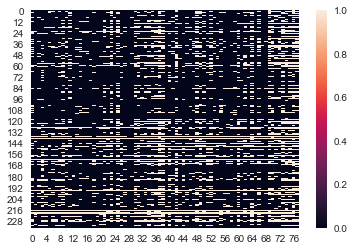

In [161]:
plt.close()
sns.heatmap(predT_b50)
plt.show()

In [186]:
params = res[res.columns[4:7]]
zparams = StandardScaler().fit_transform(params)

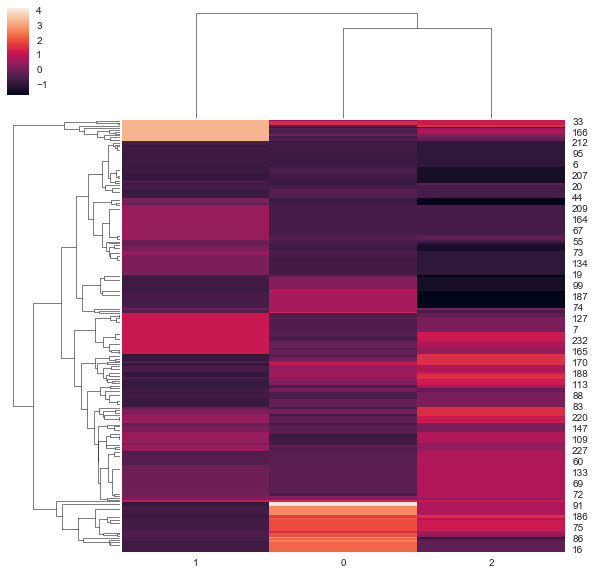

In [187]:
plt.close()
sns.clustermap(zparams)
plt.show()

In [182]:
sys.path.insert(0,'/Users/jakevogel/git/data_driven_pathology/')
import vogel_basc as vb

running cluster analyses
working on iteration 0
working on iteration 10
working on iteration 20
working on iteration 30
working on iteration 40
working on iteration 50
working on iteration 60
working on iteration 70
working on iteration 80
working on iteration 90
creating stability matrix
working on iteration 0
working on iteration 10
working on iteration 20
working on iteration 30
working on iteration 40
working on iteration 50
working on iteration 60
working on iteration 70
working on iteration 80
working on iteration 90


//anaconda/envs/py3/lib/python3.5/site-packages/seaborn/matrix.py:603: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  metric=self.metric)


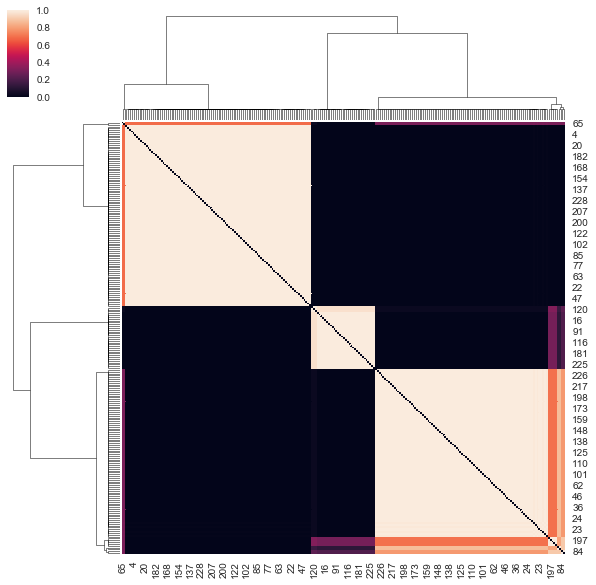

In [189]:
output = vb.poormans_basc(pandas.DataFrame(zparams),3,100,10)

In [194]:
res.loc[:,'param_cluster'] = output[0]

In [196]:
res.columns

Index(['model_r', 'model_r2', 'model_RMSE', 'model_eval', 'beta', 'delta',
       'sigma', 'ref_age', 'times', 'amyloid', 'DX', 'Age', 'Gender',
       'Education', 'ApoE4', 'Sex_bin', 'param_cluster'],
      dtype='object')

In [198]:
res.loc[:,'dx_code'] = [1 if x == 'NL' else 2 if x == 'MCI' else 3 for x in res.DX]

In [199]:
for col in res.columns[:10].tolist() + res.columns[13:].tolist():
    f,p = stats.f_oneway(res[res.param_cluster==0][col],
                         res[res.param_cluster==1][col],
                        res[res.param_cluster==2][col])
    print(col,f,p)

model_r 7.36482078018 0.000791645590039
model_r2 9.02932410449 0.000167168951825
model_RMSE 10.840472514 3.15048966742e-05
model_eval 8.50209862975 0.000272963356503
beta 293.608391614 2.10997298015e-64
delta 46.6884217628 8.88509202963e-18
sigma 246.803270629 2.85493331573e-58
ref_age 3.17591081377 0.0435697358678
times 9.86286864297 7.73216811629e-05
amyloid 0.391083986845 0.676766459991
Education 1.76203689878 0.173974847815
ApoE4 1.79621595314 0.168215483022
Sex_bin 0.659655511157 0.517992272708
param_cluster inf 0.0
dx_code 1.7077654593 0.183531411556


//anaconda/envs/py3/lib/python3.5/site-packages/scipy/stats/stats.py:2968: RuntimeWarning: divide by zero encountered in double_scalars
  f = msb / msw


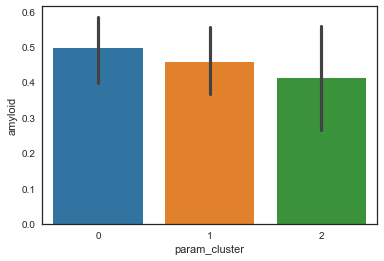

In [218]:
plt.close()
sns.barplot(x = 'param_cluster', y = 'amyloid', data = res)
plt.show()

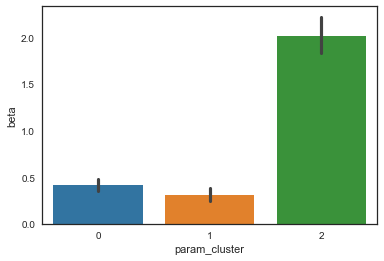

In [201]:
plt.close()
sns.barplot(x = 'param_cluster', y = 'beta', data = res)
plt.show()

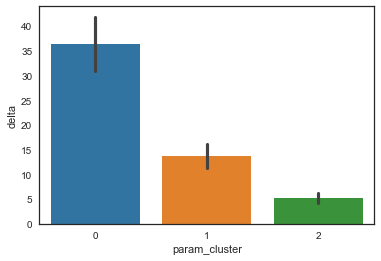

In [202]:
plt.close()
sns.barplot(x = 'param_cluster', y = 'delta', data = res)
plt.show()

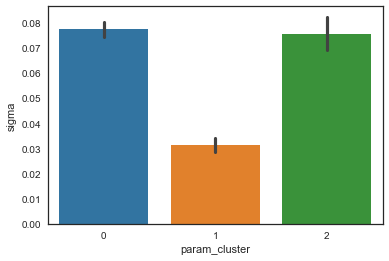

In [204]:
plt.close()
sns.barplot(x = 'param_cluster', y = 'sigma', data = res)
plt.show()